In [2]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline

from astropy.io import ascii

from scipy.integrate import quad
from scipy.interpolate import interp1d

In [3]:
ascii.read('TMHGPSData.txt', data_start = 2)

type,time,latitude,longitude,altitude (m),speed (km/h),course,sat,hdop,eos,name
str1,str19,float64,float64,float64,float64,float64,int32,float64,int32,int32
T,2018-12-08 23:47:08,37.949115,-120.794978333,88.0,0.3,74.7,6,1.1,--,--
T,2018-12-08 23:47:09,37.949115,-120.794978333,88.0,0.0,74.7,6,1.1,--,--
T,2018-12-08 23:47:10,37.949115,-120.794978333,88.0,0.0,74.7,6,1.1,--,--
T,2018-12-08 23:47:11,37.949115,-120.794978333,88.0,0.0,74.7,6,1.1,--,--
T,2018-12-08 23:47:12,37.949115,-120.794978333,88.0,0.0,74.7,6,1.1,--,--
T,2018-12-08 23:47:13,37.949115,-120.794978333,88.0,0.0,74.7,6,1.1,--,--
T,2018-12-08 23:47:14,37.949115,-120.794978333,88.0,0.0,74.7,6,1.1,--,--
T,2018-12-08 23:47:15,37.949115,-120.794978333,88.0,0.0,74.7,6,1.1,--,--
T,2018-12-08 23:47:16,37.949115,-120.794978333,88.0,0.0,74.7,6,1.1,--,--


In [4]:
gps = ascii.read('TMHGPSData.txt', data_start = 2)

In [5]:
from datetime import datetime

In [6]:
t = gps["time"]

x = gps["latitude"]
y = gps["longitude"]

alt = gps["altitude (m)"]

In [7]:
time = []
for i in range(1, len(t)-1):
    time.append(datetime.strptime(t[i], "%Y-%m-%d %H:%M:%S"))

In [8]:
print time[0].hour

23


In [9]:
flightTimeSec = []
for i in range(651, 750):
    flightTimeSec.append(i-651)

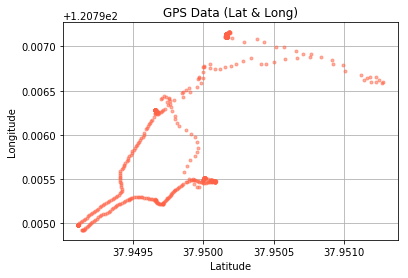

In [10]:
plot(x, -1*y, ".", alpha = .5, c = "tomato")
xlabel("Latitude")
ylabel("Longitude")
title("GPS Data (Lat & Long)")
grid()

In [11]:
mLat = (x[-1] - x[0])*111111
mLong = (y[-1] - y[0])*111111*cos(x[-1])
print "Final distance differences in x and y (m): ", mLat, mLong
mDist = sqrt(mLat**2 + mLong**2)
print "Difference between GPS reciever and build site (m): ", mDist
print "Pretty accurate results, off by about 2 meters"

Final distance differences in x and y (m):  2.9629970370224754 5.382800410279765
Difference between GPS reciever and build site (m):  6.144419557477498
Pretty accurate results, off by about 2 meters


In [12]:
xMeters = []
yMeters = []
for i in range(1, len(x)):
    xMeters.append(abs(((x[i-1] - x[0])*111111))-117)
    yMeters.append(abs(((y[i-1] - y[0])*111111*cos(x[i-1])))-233)

Text(0.5,1,'GPS Data (meters)')

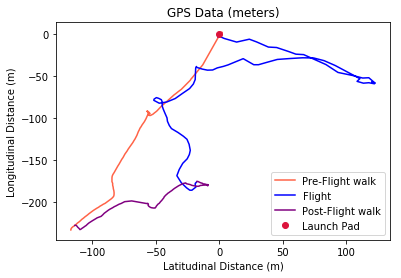

In [13]:
plot(xMeters[:650], yMeters[:650], c = "tomato", label = "Pre-Flight walk")
plot(xMeters[651:750], yMeters[651:750], c = "blue", label = "Flight")
plot(xMeters[750:], yMeters[750:], c = "purple", label = "Post-Flight walk")
plot(0, 0, ".", c = "crimson", markersize = 12, label = "Launch Pad")
legend(loc = "lower right")
xlabel("Latitudinal Distance (m)")
ylabel("Longitudinal Distance (m)")
title("GPS Data (meters)")

In [14]:
course = gps["course"]

Text(0.5,1,'TMH Course')

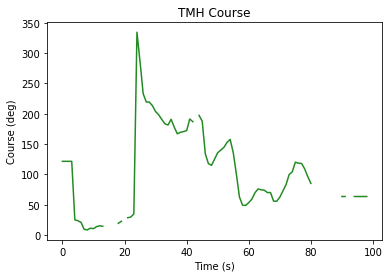

In [15]:
plot(flightTimeSec, course[651:750], c = "forestgreen")
xlabel("Time (s)")
ylabel("Course (deg)")
title("TMH Course")

In [57]:
courseX = []
courseY = []
for i in range(0, len(flightTimeSec[0:30])):
    courseX.append(cos(course[i]))
    courseY.append(sin(course[i]))
    
print courseX
print course[0:30]

[0.7659853128302462, 0.7659853128302462, 0.7659853128302462, 0.7659853128302462, 0.7659853128302462, 0.7659853128302462, 0.7659853128302462, 0.7659853128302462, 0.7659853128302462, 0.7659853128302462, 0.7659853128302462, 0.7659853128302462, 0.7659853128302462, 0.7659853128302462, 0.7659853128302462, 0.7659853128302462, 0.7659853128302462, 0.7659853128302462, 0.7659853128302462, 0.7659853128302462, 0.7659853128302462, 0.7659853128302462, 0.7659853128302462, 0.7659853128302462, 0.7659853128302462, 0.7659853128302462, 0.7659853128302462, 0.7659853128302462, 0.7659853128302462, 0.7659853128302462]
course
------
  74.7
  74.7
  74.7
  74.7
  74.7
  74.7
  74.7
  74.7
  74.7
  74.7
   ...
  74.7
  74.7
  74.7
  74.7
  74.7
  74.7
  74.7
  74.7
  74.7
  74.7
  74.7
Length = 30 rows


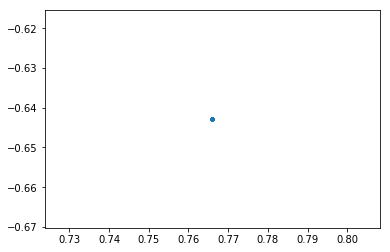

In [58]:
plot(courseX, courseY, ".")
axis("equal")
show()

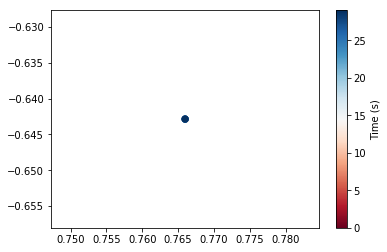

In [59]:
scatter(courseX, courseY, c = flightTimeSec[0:30], cmap = "RdBu")
colorbar(label = "Time (s)")
axis("equal")
show()

From this we can see that the vehicle does not spin very much for the majority of its flight

Actually ignore that, the gps is bad. It only recorded one course for the upward flight of the vehicle. Course is not useful in determining the end build quality of the vehicle

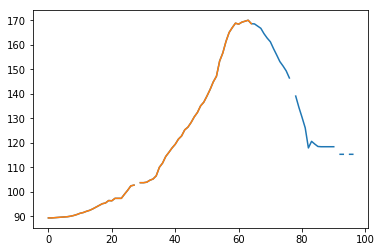

In [40]:
plot(flightTimeSec, alt[651:750])
plot(flightTimeSec[0:65], alt[651:716])

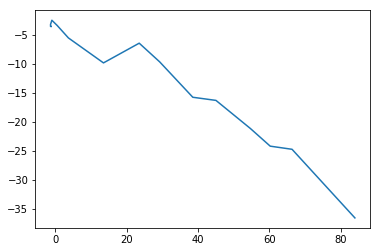

In [45]:
plot(xMeters[651:666], yMeters[651:666])